In [1]:
https://github.com/OceanParcels/GlobalMassBudget/blob/main/create_fisheries_input.py

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import timeit
import matplotlib.colors
import csv
import shapefile
import cartopy

In [6]:
import geopandas as gpd
import pandas as pd

In [3]:
## Download the rivers data from:
## https://figshare.com/articles/dataset/Supplementary_data_for_More_than_1000_rivers_account_for_80_of_global_riverine_plsatic_emissions_into_the_ocean_/14515590

In [4]:
#import pyshp

In [4]:
riverShapeFile    = '/Users/denes001/Research/Projects/PlasticParcels/data/release/Meijer2021_midpoint_emissions/Meijer2021_midpoint_emissions'#.shp'
pollutionFile        = '/Users/denes001/Research/Projects/PlasticParcels/data/release/Meijer2021_midpoint_emissions.csv'
sf = shapefile.Reader(riverShapeFile)

In [10]:
#extract files within NorthSea
rivers = {}
rivers['longitude'] = np.array([])
rivers['latitude'] = np.array([])
rivers['ID'] = np.array([],dtype=int)
rivers['dataArray'] = np.array([])

for i1 in range(len(sf.shapes())):
    lon = sf.shape(i1).points[0][0]
    lat = sf.shape(i1).points[0][1]
    
    #if plottingDomain[0] < long <plottingDomain[1] and plottingDomain[2] < lat < plottingDomain[3]:
    rivers['longitude'] = np.append(rivers['longitude'],lon)
    rivers['latitude'] = np.append(rivers['latitude'],lat)
    rivers['ID'] = np.append(rivers['ID'],i1)
    

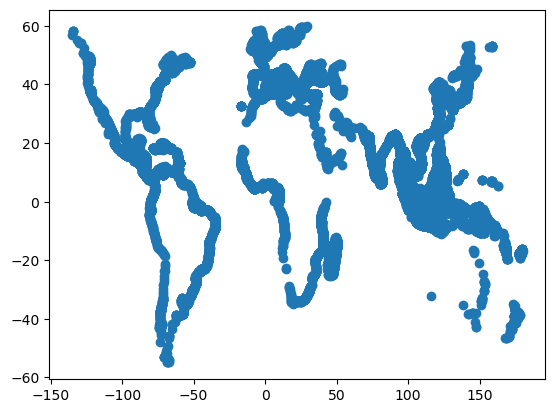

In [11]:
import matplotlib.pyplot as plt
plt.scatter(rivers['longitude'], rivers['latitude'])
plt.show()

In [37]:
## Let's try it Claudio's way
path = '/Users/denes001/Research/Projects/PlasticParcels/data/release/Meijer2021_midpoint_emissions/'
def convert_geopandas2pandas(geoDF):
    '''Replaces the geometry column with a X and Y columns
    There no built-in function for this in geopandas!

    Parameters
    ----------
    geoDF: Dataframe
        a GeoPandas Dataframe with geometry column.

    Returns
    -------
    geoDF: Dataframe
        a pandas Dataframe with X, Y coordinates for each point.
    '''

    L = len(geoDF)
    coord = np.zeros((L, 2))
    coord[:, 0] = geoDF.geometry.x
    coord[:, 1] = geoDF.geometry.y
    aux = pd.DataFrame(coord, columns=['longitude', 'latitude'])
    geoDF.drop(columns=['geometry'], inplace=True)
    geoDF = pd.concat([geoDF, aux], axis=1)
    geoDF = geoDF.rename(columns={"dots_exten":'emissions'})

    return geoDF

river_discharge = convert_geopandas2pandas(gpd.read_file(path))

In [38]:
river_discharge

,emissions,longitude,latitude
0,0.164904,168.797917,-46.580833
1,0.124932,168.348750,-46.447083
2,1.213370,168.337083,-46.418750
3,0.121138,168.021250,-46.357917
4,0.197533,169.811250,-46.343750
...,...,...,...
31814,3.937440,158.641250,53.026250
31815,3.821710,158.488750,53.029583
31816,9.836130,158.612917,53.051250
31817,1.693040,158.532083,53.067917


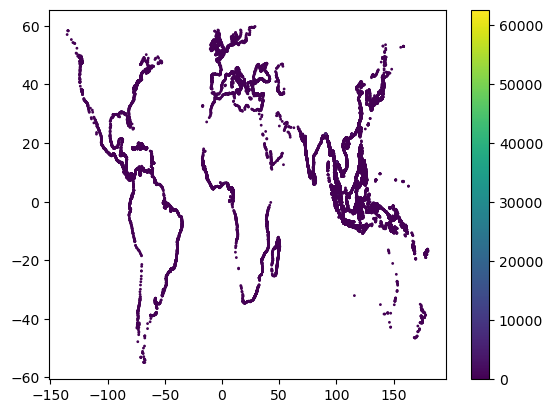

In [39]:
import matplotlib.pyplot as plt
plt.scatter(river_discharge['longitude'].values, river_discharge['latitude'].values, c=river_discharge['emissions'].values, s=1)
plt.colorbar()
plt.show()

In [27]:
river_discharge

,dots_exten,longitude,latitude
0,0.164904,168.797917,-46.580833
1,0.124932,168.348750,-46.447083
2,1.213370,168.337083,-46.418750
3,0.121138,168.021250,-46.357917
4,0.197533,169.811250,-46.343750
...,...,...,...
31814,3.937440,158.641250,53.026250
31815,3.821710,158.488750,53.029583
31816,9.836130,158.612917,53.051250
31817,1.693040,158.532083,53.067917


In [9]:
rivers

{'longitude': array([168.79791667, 168.34875   , 168.33708333, ..., 158.61291667,
        158.53208333, 142.96125   ]),
 'latitude': array([-46.58083334, -46.44708333, -46.41875   , ...,  53.05125   ,
         53.06791667,  53.57291667]),
 'ID': array([    0,     1,     2, ..., 31816, 31817, 31818]),
 'dataArray': array([], dtype=float64)}

In [ ]:

with open(pollutionFile, 'r',encoding='ascii') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',')
    i1 = 0
    for row in filereader:
        if i1 > 0:
            data_ID = i1-1 
            if i1 == 1:
                dataArray = [float(row[i2].replace(',','.')) for i2 in range(len(row))]
                rivers['dataArray'] = dataArray
            else:
                if data_ID in rivers['ID']:
                    dataArray = [float(row[i2].replace(',','.')) for i2 in range(len(row))]
                    rivers['dataArray'] = np.vstack([rivers['dataArray'],dataArray])
        i1 += 1

coastIndices = np.where(coastdata == 1)
assert(np.shape(coastIndices)[0] == 2), "coastMask.data should be an array where the first dimension of the three is empty"

# array containing indices of rivers not belonging to North Sea, which are to be deleted
deleteEntries = np.array([],dtype=int)

# matrix corresponding to fieldmesh, with per coastal cell the amount of river pollution
riverInputMatrix = np.zeros(fieldMesh_x.shape)

# for every river
for i1 in range(len(rivers['longitude'])):   
    lon_river = rivers['longitude'][i1]
    lat_river = rivers['latitude'][i1]
    dist = 1e10
    # check which point is closest
    for i2 in range(np.shape(coastIndices)[1]):
        lon_coast = lons[coastIndices[1][i2]]
        lat_coast = lats[coastIndices[0][i2]]
    
        lat_dist = (lat_river - lat_coast) * 1.11e2
        lon_dist = (lon_river - lon_coast) * 1.11e2 * np.cos(lat_river * np.pi / 180)
        dist_tmp = np.sqrt(np.power(lon_dist, 2) + np.power(lat_dist, 2))
        
        # save closest distance
        if dist_tmp < dist:
            dist = dist_tmp
            lat_ID = coastIndices[0][i2]
            lon_ID = coastIndices[1][i2]
        
    # if distance to closest point > threshold (3*approx cell length), delete entry
    if dist > 3*0.125*1.11e2:
        deleteEntries = np.append(deleteEntries,i1)
    # else: get pollution river, and add to releasematrix
    else:
        # add plastic input as obtained from the dataset
        riverInputMatrix[lat_ID,lon_ID] += rivers['dataArray'][i1,dataArray_ID]

return riverInputMatrix